In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [4]:
#load the data
df=pd.read_csv("E-com_Data.csv")

In [5]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [7]:
df.duplicated().sum()

3145

In [8]:
df=df.drop_duplicates(ignore_index=True)

In [9]:
df.duplicated().sum()

0

In [10]:
#Requried feature to build segmentation
#customerID,Invoiceno,Date of prchase,price
#recency-"Date of purcjase"
#frequency-"Invoiceno."
#monetary-"Price"

In [11]:
df.isnull().sum()/len(df)*100

CustomerID            24.869370
Item Code              0.000186
InvoieNo               0.000186
Date of purchase       0.000186
Quantity               0.000186
Time                   0.000186
price per Unit         0.000186
Price                  0.000186
Shipping Location      0.000186
Cancelled_status      98.448801
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [12]:
df=df[["CustomerID","InvoieNo","Date of purchase","Price"]]

In [13]:
df

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0
...,...,...,...,...
537966,NaN,367605.0,06-02-2017,1522.0
537967,NaN,368246.0,06-02-2017,2283.0
537968,NaN,366891.0,29-01-2017,2970.0
537969,NaN,391243.0,17-09-2017,8340.0


In [14]:
df.isnull().sum()/len(df)*100

CustomerID          24.869370
InvoieNo             0.000186
Date of purchase     0.000186
Price                0.000186
dtype: float64

In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

CustomerID          0
InvoieNo            0
Date of purchase    0
Price               0
dtype: int64

In [17]:
df.shape

(404181, 4)

In [18]:
df["CustomerID"].nunique()

4349

In [19]:
df["Date of purchase"]=pd.to_datetime(df["Date of purchase"])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404181 entries, 0 to 537940
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        404181 non-null  float64       
 1   InvoieNo          404181 non-null  float64       
 2   Date of purchase  404181 non-null  datetime64[ns]
 3   Price             404181 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [21]:
df=df.rename(columns={"InvoieNo":"Invoice_no","Date of purchase":"Date"})

In [22]:
df.head()

,CustomerID,Invoice_no,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [126]:
df["Date"].describe()

count                           404181
mean     2017-07-15 15:28:28.388073472
min                2016-12-02 00:00:00
25%                2017-04-12 00:00:00
50%                2017-08-05 00:00:00
75%                2017-10-26 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

In [24]:
df.describe()

,CustomerID,Invoice_no,Date,Price
count,404181.000000,404181.000000,404181,404181.000000
mean,2181.897630,385648.273397,2017-07-15 15:28:28.388073472,2474.139920
min,2.000000,361429.000000,2016-12-02 00:00:00,-10152.000000
25%,1207.000000,374194.000000,2017-04-12 00:00:00,555.000000
50%,2078.000000,386937.000000,2017-08-05 00:00:00,1572.000000
75%,3291.000000,397130.000000,2017-10-26 00:00:00,2492.000000
max,4372.000000,406651.000000,2017-12-19 00:00:00,90400.000000
std,1252.681271,13107.396221,NaN,4891.388347


In [128]:
import datetime
new_date=datetime.datetime(2017,12,20)

In [50]:
new_date

datetime.datetime(2017, 12, 20, 0, 0)

In [130]:
RFMapproach=df.groupby(by="CustomerID").agg({"Date":lambda x:(new_date-x.max()).days,"Invoice_no":lambda x:x.count(),"Price":lambda x:x.sum()})

In [132]:
RFMapproach=RFMapproach.rename(columns={"Date":"Recency","Invoice_no":"Frequency","Price":"Monetary"})
RFMapproach.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,754,280608.0


In [134]:
RFMapproach.describe()

,Recency,Frequency,Monetary
count,4349.000000,4349.000000,4.349000e+03
mean,93.299379,92.936537,2.299380e+05
std,100.701315,232.086935,8.572589e+05
min,1.000000,1.000000,-5.037200e+04
25%,18.000000,17.000000,3.814800e+04
50%,51.000000,42.000000,8.365500e+04
75%,144.000000,101.000000,2.056120e+05
max,381.000000,7970.000000,3.553619e+07


In [136]:
#Using quantile method to make clusters
quantiles=RFMapproach.quantile(q=[0.25,0.50,0.75])
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [138]:
def Recency_values(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.5]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
        

In [140]:
def Frequency_Monetary_values(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1
        

In [142]:
RFMapproach["R"]=RFMapproach["Recency"].apply(Recency_values,args=("Recency",quantiles))
RFMapproach["F"]=RFMapproach["Frequency"].apply(Frequency_Monetary_values,args=("Frequency",quantiles))
RFMapproach["M"]=RFMapproach["Monetary"].apply(Frequency_Monetary_values,args=("Monetary",quantiles))                                              

In [144]:
RFMapproach

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,3,3,1
4.0,19,72,176613.0,2,2,2
5.0,311,16,41976.0,4,4,3
6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4
4369.0,181,7,10774.0,4,4,4
4370.0,9,13,24962.0,1,4,4


In [146]:
RFMapproach["RFM"]=RFMapproach[["R","F","M"]].sum(axis=1)

In [148]:
RFMapproach

,Recency,Frequency,Monetary,R,F,M,RFM
CustomerID,,,,,,,
2.0,4,182,553704.0,1,1,1,3
3.0,77,27,257404.0,3,3,1,7
4.0,19,72,176613.0,2,2,2,6
5.0,311,16,41976.0,4,4,3,11
6.0,37,84,151822.0,2,2,2,6
...,...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4,12
4369.0,181,7,10774.0,4,4,4,12
4370.0,9,13,24962.0,1,4,4,9


In [94]:
RFMapproach["RFM"].nunique()

10

In [150]:
Loyality_level=["Platinum","Gold","Silver","Bronze"]
score_cuts=pd.qcut(RFMapproach.RFM,q=4,labels=Loyality_level)
RFMapproach["Loyality_level"]=score_cuts.values

In [152]:
RFMapproach=RFMapproach.reset_index()
RFMapproach

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyality_level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12,Bronze
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,9,13,24962.0,1,4,4,9,Silver
4347,4371.0,4,754,280608.0,1,1,1,3,Platinum


In [154]:
Final_report=RFMapproach.groupby("Loyality_level")[["Recency","Frequency","Monetary","CustomerID"]].agg({"Recency":"sum","Frequency":"sum","Monetary":"sum","CustomerID":"nunique"}).reset_index()
Final_report

,Loyality_level,Recency,Frequency,Monetary,CustomerID
0,Platinum,25988,295781,764912338.0,1281
1,Gold,84082,76027,166230918.0,1313
2,Silver,121757,23778,50300946.1,965
3,Bronze,173932,8595,18556145.0,790


In [156]:
Final_report["Percent"]=Final_report["CustomerID"]/Final_report["CustomerID"].sum()*100

In [168]:
Final_report=Final_report.rename(columns={"CustomerID":"Num_of_buyers"})
Final_report

,Loyality_level,Recency,Frequency,Monetary,Num_of_buyers,Percent
0,Platinum,25988,295781,764912338.0,1281,29.455047
1,Gold,84082,76027,166230918.0,1313,30.190848
2,Silver,121757,23778,50300946.1,965,22.189009
3,Bronze,173932,8595,18556145.0,790,18.165095


In [172]:
Final_report = Final_report[['Loyality_level','Num_of_buyers','Percent']]

In [174]:
Final_report

,Loyality_level,Num_of_buyers,Percent
0,Platinum,1281,29.455047
1,Gold,1313,30.190848
2,Silver,965,22.189009
3,Bronze,790,18.165095


In [176]:
import squarify

<function matplotlib.pyplot.show(close=None, block=None)>

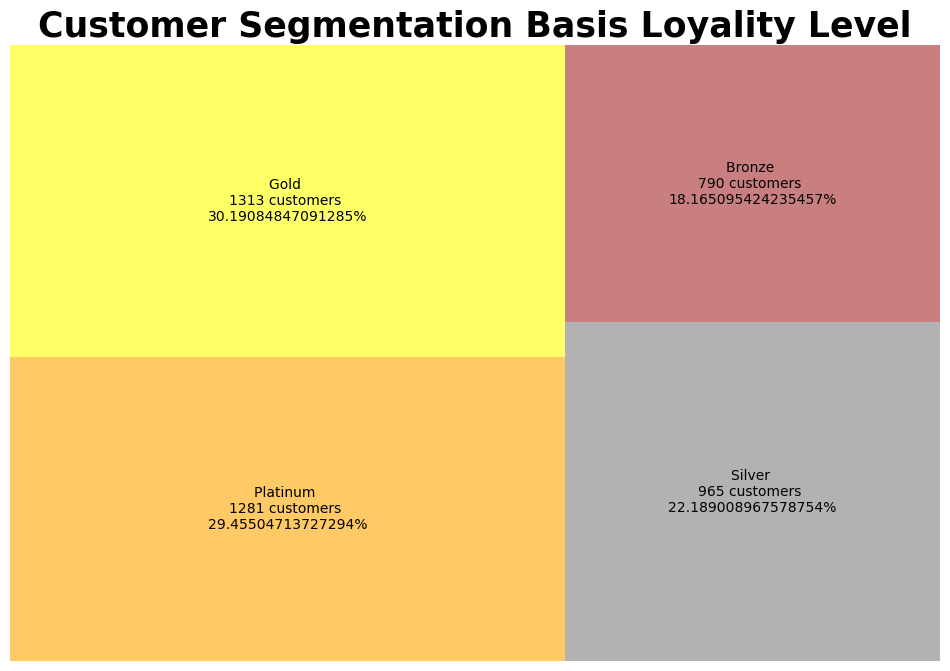

In [184]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12,8)
colors_dict = {'Platinum':'orange', 'Gold':'yellow','Silver':'gray', 'Bronze':'brown'}
squarify.plot(sizes = Final_report['Num_of_buyers'], color = colors_dict.values(),
              label = ['{} \n{:0.0f} customers \n{}%'.format(*Final_report.iloc[i]) 
                       for i in range(0, len(Final_report))], alpha=0.6)

plt.title("Customer Segmentation Basis Loyality Level", fontsize=25, fontweight ='bold')
plt.axis('off')
plt.show